In [1]:
import matplotlib.pyplot as plt
plt.style.use('styles/gcpeixoto-book.mplstyle')

# Método da Bisseção

O método da bisseção é uma das técnicas mais fundamentais para busca de raízes de equações não-lineares. Robusto e de fácil implementação, ele está estruturado no Teorema do Valor Intermediário, que afirma que se uma função contínua $f(x)$ tem sinais opostos em dois pontos $a$ e $b$, condição que se verifica quando $f(a) f(b) < 0$ é verdadeira, então existe pelo menos uma raiz da função no intervalo $[a, b]$. Em termos simples, o método envolve dividir repetidamente o intervalo ao meio e selecionar o subintervalo onde a raiz deve estar, baseando-se nos sinais de $f$.

O método da bisseção tem garantia de convergência, desde que a função seja contínua e o intervalo inicial seja escolhido corretamente. No entanto, a convergência pode ser lenta em comparação com outros métodos, especialmente quando a função tem múltiplas raízes próximas. Neste capítulo, apresentaremos uma implementação caseira do método da bisseção para equações não-lineares unidimensionais. O algoritmo é capaz de lidar com as principais funções matemáticas da biblioteca `numpy`, possui alguns comandos para checagem de validade e usa a estrutura `while` para o laço do processo iterativo.

```{figure} figs/while-ai.png
---
width: 400px
name: fig-whileai
---
```

## Implementação de alogoritmo

Para ser executada, a função `bissecao` requer 5 parâmetros: 

- a função $f(x)$ propriamente dita, representada por `f`;
- o intervalo de busca da raiz $[a,b]$, representado pelas estimativas iniciais `a` e `b`;
- o erro absoluto desejado $EA_d$, representado por `e`;
- o número máximo de iterações $N$ para tentativa de solução, representado por `N`.

In [2]:
import inspect, re 
import numpy as np
from matplotlib.pyplot import plot
from warnings import warn
from prettytable import PrettyTable as pt

def bissecao(f,a,b,tol,N):
    """Algoritmo para determinação de raízes de equações não lineares 
       unidimensionais pelo método da bisseção.

    Parâmetros: 
        f: string dependendo de uma variável, i.e., a função-alvo
            (e.g., 'x**2 - 1', 'x**2*cos(x)', etc.) 
        a: estimativa inferior
        b: estimativa superior
        tol: erro desejado (tolerância)
        N: número máximo de iterações a repetir

    Retorno: 
        x: aproximação para a raiz da função   
    """
    
    # construtor de tabela
    table = pt()
    
    # substitui expressões da string pelas chamadas das funções do numpy
    f = re.sub('(sin|sinh|cos|cosh|tan|tanh|exp|log|sqrt|log10|arcsin|arccos|arctan|arcsinh|arccosh|arctanh)', r'np.\1', f)
    
    # identifica a variável independente
    var = re.search(r'([a-zA-Z][\w]*) ?([\+\-\/*]|$|\))', f).group(1)
    
    # cria função anônima
    f = eval('lambda ' + var + ' :' + f)
    
    # checa se a função é de uma variável, senão lança erro        
    if len(inspect.getfullargspec(f).args) - 1 > 0:    
        raise ValueError('O código é válido apenas para uma variável.')

    # calcula valor da função nos extremos
    fa = f(a) 
    fb = f(b)
    
    # verifica sinal da função para o intervalo passado     
    if fa*fb >= 0:
        raise ValueError('A função deve ter sinais opostos em a e b!')
    
    # flag usada para marcar caso f(xm) = 0
    done = False;
        
    # no. iterações mínimo
    niter = int(np.ceil(np.log((b-a)/tol)/np.log(2)))
    if N < niter:
        print(f'São necessárias pelo menos {niter} iterações, mas N = {N}.\n')

    
    # cabeçalho de tabela
    table.field_names = ['i','xm','f(xm)','a','b','f(a)','f(b)','EA']

    # bisecta o intervalo
    xm = (a+b)/2
    
    # contador 
    i = 1 
    
    # loop 
    while abs(a-b) > tol and (not done and N != 0):    
        
        # avalia a função no ponto médio
        fxm = f(xm) 
                        
        # adiciona linha de tabela de resultado
        table.add_row([i,np.round(xm,8),np.round(f(xm),8),
                   np.round(a,4),np.round(b,4),
                   np.round(f(a),4),np.round(f(b),4),
                   f'{abs(a-b):e}'])
   
        if fa*fxm < 0:      # Raiz esta à esquerda de xm
            b = xm
            fb = fxm
            xm = (a+b)/2
        elif fxm*fb < 0:    # Raiz esta à direita de xm
            a = xm
            fa = fxm
            xm = (a+b)/2
        else:               # Achamos a raiz
            done = True            
    
        N -= 1              # Atualiza passo
        i += 1              # Atualiza contador
    
    # impressão de tabela
    table.add_row([i,np.round(xm,8),np.round(f(xm),8),
                   np.round(a,4),np.round(b,4),
                   np.round(f(a),4),np.round(f(b),4),
                   f'{abs(a-b):e}'])
    table.align = 'c'; print(table)
    
    return xm

Note que o cerne desta função é o trecho abaixo. O resto do código é constituído de algumas especializações e comandos acessórios.

```python
while abs(a-b) > tol and (not done and N != 0):    
    
    # avalia a função no ponto médio
    fxm = f(xm) 

    if fa*fxm < 0:      # Raiz esta à esquerda de xm
        b = xm
        fb = fxm
        xm = (a+b)/2
    elif fxm*fb < 0:    # Raiz esta à direita de xm
        a = xm
        fa = fxm
        xm = (a+b)/2
    else:               # Achamos a raiz
        done = True            

    N -= 1              # Atualiza passo
    i += 1              # Atualiza contador

## Exemplos resolvidos

**Exemplo:** Resolva o problema $f(x) = 0$, para $f(x) = -\text{arccos}(x) + 4\text{sen}(x) + 1.7$, no intervalo $-0.2 \le x \le 1.0$ e $\epsilon = 10^{-3}$.

- Primeiramente, façamos uma análise gráfica para verificar o comportamento da função.

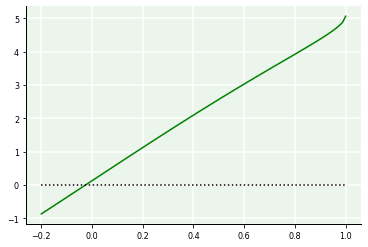

In [3]:
x = np.linspace(-0.2,1,100)
plot(x,-np.arccos(x) + 4*np.sin(x) + 1.7,'g',x,0*x,'k:');

- Uma vez que a raiz é única, basta aplicar o método que construímos à função desejada.

In [4]:
xm = bissecao('-arccos(x) + 4*sin(x) + 1.7',-0.2,1.0,1e-3,40)

+----+-------------+-------------+---------+---------+---------+--------+--------------+
| i  |      xm     |    f(xm)    |    a    |    b    |   f(a)  |  f(b)  |      EA      |
+----+-------------+-------------+---------+---------+---------+--------+--------------+
| 1  |     0.4     |  2.09839389 |   -0.2  |   1.0   | -0.8668 | 5.0659 | 1.200000e+00 |
| 2  |     0.1     |  0.62870476 |   -0.2  |   0.4   | -0.8668 | 2.0984 | 6.000000e-01 |
| 3  |    -0.05    | -0.12073386 |   -0.2  |   0.1   | -0.8668 | 0.6287 | 3.000000e-01 |
| 4  |    0.025    |  0.25419586 |  -0.05  |   0.1   | -0.1207 | 0.6287 | 1.500000e-01 |
| 5  |   -0.0125   |  0.06670465 |  -0.05  |  0.025  | -0.1207 | 0.2542 | 7.500000e-02 |
| 6  |   -0.03125  | -0.02703107 |  -0.05  | -0.0125 | -0.1207 | 0.0667 | 3.750000e-02 |
| 7  |  -0.021875  |  0.01983391 | -0.0312 | -0.0125 |  -0.027 | 0.0667 | 1.875000e-02 |
| 8  |  -0.0265625 | -0.00359946 | -0.0312 | -0.0219 |  -0.027 | 0.0198 | 9.375000e-03 |
| 9  | -0.02421875 | 

- A raiz aproximada $x^{*}$, tal que para $f(x^{*}) = 0$ no intervalo-alvo é mostrada na última linha da tabela. Isto é,

In [5]:
# raiz aproximada
xm

-0.02568359375

**Exemplo:** Resolva o problema $h(z) = 0$, para $h(z) = -z(1-2z)^{-1} - \text{tan}(z+1)$, no intervalo $[1,8]$ e $\epsilon = 10^{-5}$.

- Primeiramente, façamos uma análise gráfica para verificar o comportamento da função.

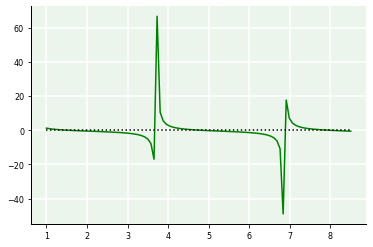

In [6]:
z = np.linspace(1,8.5,100)
plot(z,z/(1 - 2*z) - np.tan(z+1),'g',z,0*z,'k:');

- Neste caso, a função apresenta sensibilidades e mais de uma raiz no intervalo dado. Vamos buscar a raiz que está no subintervalo $[4,6]$. Para tanto, vamos deamplificar a plotagem.

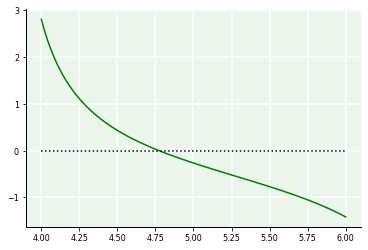

In [7]:
z = np.linspace(4,6,100)
plot(z,z/(1 - 2*z) - np.tan(z+1),'g',z,0*z,'k:');

- Uma vez que a raiz é única, basta aplicar o método que construímos à função desejada.

In [8]:
zm = bissecao('z/(1 - 2*z) - tan(z+1)',4,6,1e-5,20)

+----+------------+-------------+--------+--------+--------+---------+--------------+
| i  |     xm     |    f(xm)    |   a    |   b    |  f(a)  |   f(b)  |      EA      |
+----+------------+-------------+--------+--------+--------+---------+--------------+
| 1  |    5.0     | -0.26454936 |   4    |   6    | 2.8091 | -1.4169 | 2.000000e+00 |
| 2  |    4.5     |  0.43308405 |   4    |  5.0   | 2.8091 | -0.2645 | 1.000000e+00 |
| 3  |    4.75    |  0.03138032 |  4.5   |  5.0   | 0.4331 | -0.2645 | 5.000000e-01 |
| 4  |   4.875    | -0.12466745 |  4.75  |  5.0   | 0.0314 | -0.2645 | 2.500000e-01 |
| 5  |   4.8125   | -0.04914268 |  4.75  | 4.875  | 0.0314 | -0.1247 | 1.250000e-01 |
| 6  |  4.78125   | -0.00957612 |  4.75  | 4.8125 | 0.0314 | -0.0491 | 6.250000e-02 |
| 7  |  4.765625  |  0.01071879 |  4.75  | 4.7812 | 0.0314 | -0.0096 | 3.125000e-02 |
| 8  | 4.7734375  |  0.00052675 | 4.7656 | 4.7812 | 0.0107 | -0.0096 | 1.562500e-02 |
| 9  | 4.77734375 | -0.00453568 | 4.7734 | 4.7812 | 0.

- A raiz aproximada $z^{*}$, tal que para $h(z^{*}) = 0$ é mostrada na última linha da tabela. Isto é,

In [9]:
# raiz aproximada
zm

4.773845672607422

Por fim, vamos aplicar nosso método da bisseção ao problema do paraquedista apresentado no capítulo introdutório para buscar o coeficiente de arrasto adequado para os parâmetros de projeto impostos. 

Primeiramente, definiremos uma função para retornar a equação particular.

In [10]:
def eq_paraq(tempo,massa,vel,grav):
    """ Define equação particular para cálculo de coeficiente de arrasto 
        em salto de paraquedista. (Ver introdução.)
        
        Parâmetros: 
        
            tempo: duração de salto até velocidade terminal [s]
            massa: massa do paraquedista [kg]
            vel: velocidade terminal desejada [m/s]
            grav: aceleração gravitacional ambiente [m/s**2]
        
        Retorno: 
        
            f: expressão numérica para equação particular
               do coeficiente de arrasto
                
    """
    
    # variáveis simbólicas    
    from sympy import symbols, exp, lambdify
    
    g,m,t,v,c = symbols('g,m,t,v,c')
    
    # expressão geral
    f = (g*m/c)*(1 - exp((-c/m)*t)) - v
    
    # expressão particular com valores substituídos convertidos para str
    fs = f.subs({'g':grav,'m':massa,'v':vel,'t':tempo})
    
    # expressão simbólica convertida para expessão numérica
    fn = lambdify(c,fs,"numpy")
    
    # imprime para 
    print(f'Equação particular: f(c) = {fs}')
    
    return (fs,fn)

Em seguida, inserimos valores de entrada para teste. 

In [11]:
# parâmetros de entrada
tempo, massa, vel, grav = 12, 70, 42, 9.81

# equação particular
fs,fn = eq_paraq(tempo,massa,vel,grav)

Equação particular: f(c) = -42 + 686.7*(1 - exp(-6*c/35))/c


O próximo passo realiza a análise gráfica para localização do intervalo de aproximação da raiz.

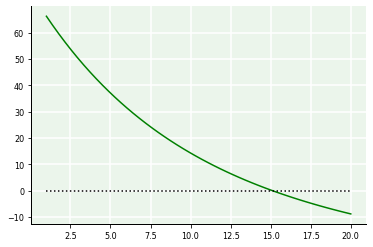

In [12]:
c = np.linspace(1,20)
plot(c,fn(c),'g',c,0*c,'k:');

Encerrando, chamamos a função.

In [13]:
cm = bissecao(str(fs),14,17.0,1e-4,20)

+----+-------------+-------------+---------+---------+--------+---------+--------------+
| i  |      xm     |    f(xm)    |    a    |    b    |  f(a)  |   f(b)  |      EA      |
+----+-------------+-------------+---------+---------+--------+---------+--------------+
| 1  |     15.5    | -0.80457281 |    14   |   17.0  | 2.6003 |  -3.797 | 3.000000e+00 |
| 2  |    14.75    |  0.84203047 |    14   |   15.5  | 2.6003 | -0.8046 | 1.500000e+00 |
| 3  |    15.125   |  0.00533671 |  14.75  |   15.5  | 0.842  | -0.8046 | 7.500000e-01 |
| 4  |   15.3125   | -0.40289836 |  15.125 |   15.5  | 0.0053 | -0.8046 | 3.750000e-01 |
| 5  |   15.21875  | -0.19960925 |  15.125 | 15.3125 | 0.0053 | -0.4029 | 1.875000e-01 |
| 6  |  15.171875  | -0.09734443 |  15.125 | 15.2188 | 0.0053 | -0.1996 | 9.375000e-02 |
| 7  |  15.1484375 | -0.04605603 |  15.125 | 15.1719 | 0.0053 | -0.0973 | 4.687500e-02 |
| 8  | 15.13671875 | -0.02037272 |  15.125 | 15.1484 | 0.0053 | -0.0461 | 2.343750e-02 |
| 9  | 15.13085938 | 

Como se vê, o coeficiente de arrasto aproximado para este caso é dado por:

In [14]:
cm

15.127426147460938

## Tarefas

- Repita a análise anterior alterando os parâmetros de projeto de salto para paraquedistas de diferentes massas e com duração de salto até a velocidade terminal variáveis. Faça a análise gráfica e busque aproximações.

- Programe uma nova função para executar o método da falsa posição ou estenda o código anterior para uma nova função que contemple os dois casos (sugestão: use `if`).

## Problema proposto 

Uma reação química reversível $2A+B \iff C$ pode ser caracterizada pela relação de equilíbrio $K = \frac{c_c}{c_a^2c_b}$, onde $c_i$ representa a concentração do constituinte $i$. Suponha que:

- $x$ é o número de moles de $C$ que são produzidos
- a conservação da massa pode ser usada para reformular a relação de equilíbrio como $K = \dfrac{(c_{c,0} + x)}{(c_{a,0} - 2x)^2 (c_{b,0} - x)}$, onde o subscrito $0$ designa a concentração inicial de cada constituinte. 
- $K = 0,016$, $c_{a,0} = 42$, $c_{b,0} = 28$ e $c_{c,0} = 4$.

Dispondo dessas informações:

1. Faça a análise gráfica do modelo matemático do problema.
2. Defina o(s)intervalo(s) adequados(s) de localização da raiz.
3. Aplique o método da bisseção para determinar uma aproximação para $x$ com erro inferior a $10^{-5}$.

In [15]:
plt.rcdefaults()